In [1]:
import sys
import os

sys.path.append(os.path.abspath('C:/Users/teeyob/Rossmann_Sales_Forecasting/scripts'))
import pandas as pd




In [2]:
test=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/test.csv')
train=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/train.csv')
store=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/store.csv')

C:\Users\teeyob\AppData\Local\Temp\ipykernel_5180\1489791278.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv('C:/Users/teeyob/Rossmann_Sales_Forecasting/data/train.csv')


In [3]:
train_store_merged = pd.merge(train, store, on='Store', how='left')
train_store_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

C:\Users\teeyob\Rossmann_Sales_Forecasting\scripts\lstm_sales_prediction.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].mean(), inplace=True)
c:\Users\teeyob\Rossmann_Sales_Forecasting\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 285s 11ms/step - loss: 0.0217
Epoch 2/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 288s 11ms/step - loss: 0.0190
Epoch 3/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 279s 11ms/step - loss: 0.0187
Epoch 4/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 283s 11ms/step - loss: 0.0185
Epoch 5/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 286s 11ms/step - loss: 0.0182
Epoch 6/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 278s 11ms/step - loss: 0.0177
Epoch 7/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 276s 11ms/step - loss: 0.0171
Epoch 8/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 293s 12ms/step - loss: 0.0165
Epoch 9/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 285s 11ms/step - loss: 0.0158
Epoch 10/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 282s 11ms/step - loss: 0.0153
Epoch 11/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 281s 11ms/step - loss: 0.0147
Epoch 12/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 5457s 215ms/step - loss: 0.0144
Epoch 13/50
25430/25430 ━━━━━━━━━━━━━━━━━━━━ 280s 11ms/step - loss: 0.0142
Epoch 14/50
25430/25430 ━━━━━━━━

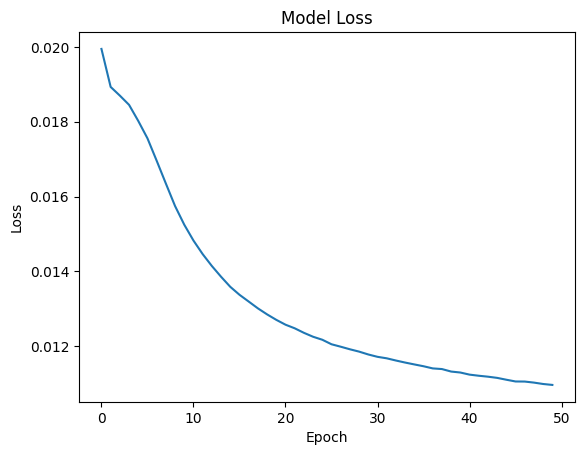

6358/6358 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step
Predicted sales for the next day: [9152.44]


In [4]:

from sklearn.model_selection import train_test_split, cross_validate
import pandas as pd
from lstm_sales_prediction import preprocess_data, check_stationarity, create_lagged_features, scale_data, build_lstm_model, train_model, make_predictions, plot_loss


df = preprocess_data(train_store_merged)

df = check_stationarity(df, 'Sales')

n_lag = 30  
features, target = create_lagged_features(df[['Sales']], n_lag)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

X_train_scaled, y_train_scaled, scaler = scale_data(X_train, y_train)

input_shape = (X_train_scaled.shape[1], X_train_scaled.shape[2])
model = build_lstm_model(input_shape)

history = train_model(model, X_train_scaled, y_train_scaled)

plot_loss(history)


predictions = make_predictions(model, X_test, scaler)


print(f'Predicted sales for the next day: {predictions[-1]}')


In [5]:
model.save('lstm_sales_model.h5')
